# Imports

In [1]:
import pandas as pd

from excel_report import dataset_stats, groups_size_hist

# Datasets stats

In [2]:
datasets_dict = {
    'eth': dataset_stats('./ETH/seq_eth'),
    'hotel': dataset_stats('./ETH/seq_hotel'),
    'zara01': dataset_stats('./UCY/zara01'),
    'zara02': dataset_stats('./UCY/zara02'),
    'students03': dataset_stats('./UCY/students03')
}

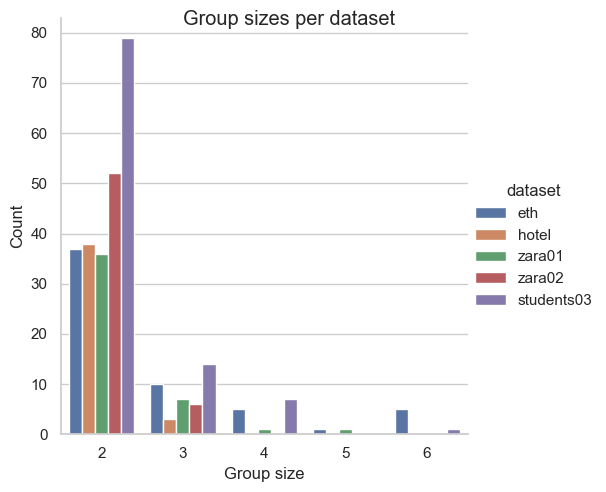

In [3]:
groups_dict = {
    'eth': datasets_dict['eth']['groups'],
    'hotel': datasets_dict['hotel']['groups'],
    'zara01': datasets_dict['zara01']['groups'],
    'zara02': datasets_dict['zara02']['groups'],
    'students03': datasets_dict['students03']['groups']
}
groups_size_hist(groups_dict, './group_size_plot.png')

In [4]:
stats_df = pd.DataFrame.from_dict(datasets_dict, orient='index')
stats_df['groups'] = stats_df['groups'].str.len()
stats_df.drop(columns=['df'])

,groups,agents,frames,single agent groups,duration
eth,58,360,1448,201,773.4
hotel,41,390,1168,305,722.4
zara01,45,148,866,46,360.4
zara02,58,204,1052,82,420.4
students03,101,428,540,194,215.6


# Single dataset preprocessing

In [5]:
dataset = 'eth'
df = datasets_dict[dataset]['df']
groups = datasets_dict[dataset]['groups']

In [6]:
df.head()

,frame_id,agent_id,pos_x,pos_y,v_x,v_y,timestamp
0,780,1,8.456844,3.588066,1.671714,0.176292,52.0
1,786,1,9.125530,3.658583,1.662877,0.326723,52.4
2,792,1,9.787146,3.849445,1.683334,0.371084,52.8
3,798,1,10.472197,3.955450,1.598568,0.264795,53.2
4,804,1,11.066000,4.061280,1.574526,0.456390,53.6


number of frames for each agent

In [7]:
agent_occurrences = df['agent_id'].value_counts()
agent_occurrences

171    190
216    101
238     95
52      64
51      64
      ... 
26       3
288      3
282      2
115      2
292      2
Name: agent_id, Length: 360, dtype: int64

number of people for each frame

In [8]:
frame_occurrences = df['frame_id'].value_counts()
frame_occurrences

10383    27
10437    26
10377    26
10365    26
10371    26
         ..
4625      1
8703      1
8679      1
4577      1
1950      1
Name: frame_id, Length: 1448, dtype: int64

# Trajectories

Use of eth proposed loader

In [9]:
from loader import load_eth
eth_traj_dataset = load_eth('./ETH/seq_eth/obsmat.txt')
eth_trajs = eth_traj_dataset.get_trajectories()
print(eth_traj_dataset.data.iloc[eth_trajs.groups[0, 1]])  # get trajectory of scene_id 0 and pedestrian_id 1
print(eth_traj_dataset.data[eth_traj_dataset.data['agent_id'] == 1])
print(eth_traj_dataset.data.shape)

   frame_id  agent_id      pos_x     pos_y     vel_x     vel_y  scene_id  \
0       780         1   8.456844  3.588066  1.671714  0.176292         0   
1       786         1   9.125530  3.658583  1.662877  0.326723         0   
2       792         1   9.787146  3.849445  1.683334  0.371084         0   
3       798         1  10.472197  3.955450  1.598568  0.264795         0   
4       804         1  11.066000  4.061280  1.574526  0.456390         0   
6       810         1  11.731818  4.320563  1.644127  0.544391         0   
8       816         1  12.381302  4.496793  1.623709  0.440576         0   

        label  timestamp  
0  pedestrian       52.0  
1  pedestrian       52.4  
2  pedestrian       52.8  
3  pedestrian       53.2  
4  pedestrian       53.6  
6  pedestrian       54.0  
8  pedestrian       54.4  
   frame_id  agent_id      pos_x     pos_y     vel_x     vel_y  scene_id  \
0       780         1   8.456844  3.588066  1.671714  0.176292         0   
1       786         1  

# Thoughts and TODOs

goal: data for all agents, both in or not in groups
problems: agents in low number of frames

number of same agents in X consecutive frames

In [35]:
agent_sets = df.groupby('frame_id')['agent_id'].apply(list).reset_index(name='agents')
agent_sets.head()

,frame_id,agents
0,780,[1]
1,786,[1]
2,792,[1]
3,798,[1]
4,804,"[1, 2]"


In [36]:
frame_ids = agent_sets.frame_id.values
consecutive_frames = 3 # change this for longer trajectory
frame_id_combs = [list(frame_ids[i:i+consecutive_frames]) for i, frame_id in enumerate(frame_ids[:-consecutive_frames])]
frame_id_combs

[[780, 786, 792],
 [786, 792, 798],
 [792, 798, 804],
 [798, 804, 810],
 [804, 810, 816],
 [810, 816, 822],
 [816, 822, 828],
 [822, 828, 834],
 [828, 834, 840],
 [834, 840, 846],
 [840, 846, 852],
 [846, 852, 858],
 [852, 858, 864],
 [858, 864, 870],
 [864, 870, 876],
 [870, 876, 882],
 [876, 882, 888],
 [882, 888, 894],
 [888, 894, 900],
 [894, 900, 906],
 [900, 906, 912],
 [906, 912, 918],
 [912, 918, 924],
 [918, 924, 930],
 [924, 930, 936],
 [930, 936, 942],
 [936, 942, 948],
 [942, 948, 954],
 [948, 954, 960],
 [954, 960, 966],
 [960, 966, 972],
 [966, 972, 978],
 [972, 978, 984],
 [978, 984, 990],
 [984, 990, 996],
 [990, 996, 1002],
 [996, 1002, 1008],
 [1002, 1008, 1014],
 [1008, 1014, 1020],
 [1014, 1020, 1026],
 [1020, 1026, 1032],
 [1026, 1032, 1038],
 [1032, 1038, 1044],
 [1038, 1044, 1050],
 [1044, 1050, 1056],
 [1050, 1056, 1062],
 [1056, 1062, 1068],
 [1062, 1068, 1074],
 [1068, 1074, 1080],
 [1074, 1080, 1086],
 [1080, 1086, 1092],
 [1086, 1092, 1098],
 [1092, 1098, 11

In [37]:
agent_sets[agent_sets['frame_id'] == 792]['agents'].iloc[0]

[1]

In [38]:
combs = []
for frames in frame_id_combs:
    comb_dict = {}
    agent_list = []
    agent_list = [set(agent_sets[agent_sets['frame_id'] == frame]['agents'].iloc[0]) for frame in frames]
    comb_dict['frames'] = frames
    comb_dict['common_agents'] = set.intersection(*agent_list)
    comb_dict['total_agents'] = set.union(*agent_list)
    print('common agents: {}, common agents/total agents: {}/{}'.format(comb_dict['common_agents'], len(comb_dict['common_agents']), len(comb_dict['total_agents'])))
    combs.append(comb_dict)
combs[1000]

common agents: {1}, common agents/total agents: 1/1
common agents: {1}, common agents/total agents: 1/1
common agents: {1}, common agents/total agents: 1/2
common agents: {1}, common agents/total agents: 1/2
common agents: {1, 2}, common agents/total agents: 2/2
common agents: {2}, common agents/total agents: 1/2
common agents: {2}, common agents/total agents: 1/2
common agents: {2}, common agents/total agents: 1/2
common agents: {2}, common agents/total agents: 1/2
common agents: {2, 3}, common agents/total agents: 2/5
common agents: {2, 3}, common agents/total agents: 2/5
common agents: {2, 3, 4, 5, 6}, common agents/total agents: 5/5
common agents: {2, 3, 4, 5, 6}, common agents/total agents: 5/5
common agents: {2, 3, 4, 5, 6}, common agents/total agents: 5/5
common agents: {2, 3, 4, 5, 6}, common agents/total agents: 5/5
common agents: {2, 3, 4, 5, 6}, common agents/total agents: 5/5
common agents: {2, 3, 4, 5, 6}, common agents/total agents: 5/5
common agents: {2, 3, 4, 5, 6}, com

{'frames': [9297, 9303, 9309],
 'common_agents': {212, 213, 214},
 'total_agents': {212, 213, 214, 215, 216, 217, 218}}

In [124]:
agents_threshold = 7
frames_df = df.groupby('frame_id')['agent_id'].apply(list).reset_index(name='agents')
frames_df['agents_num'] = frames_df['agents'].apply(len)
frame_ids_to_be_removed = list(frames_df[frames_df['agents_num'] < agents_threshold]['frame_id'].values)
print('Number of frames: {}'.format(len(set(df['frame_id'].values))))
print('Number of frames to be removed: {}'.format(len(frame_ids_to_be_removed)))
# frame_ids_to_be_removed

Number of frames: 536
Number of frames to be removed: 0


In [125]:
frames_threshold = 5
agents_df = df.groupby('agent_id')['frame_id'].apply(list).reset_index(name='frames')
agents_df['frames_num'] = agents_df['frames'].apply(len)
agent_ids_to_be_removed = list(agents_df[agents_df['frames_num'] < frames_threshold]['agent_id'].values)
print('Number of agents: {}'.format(len(set(df['agent_id'].values))))
print('Number of agents to be removed: {}'.format(len(agent_ids_to_be_removed)))
# agent_ids_to_be_removed

Number of agents: 289
Number of agents to be removed: 0


In [126]:
df = df[df.frame_id.isin(frame_ids_to_be_removed) == False]
df = df[df.agent_id.isin(agent_ids_to_be_removed) == False]
print(len(set(df.frame_id.values)))
print(len(set(df.agent_id.values)))

536
289


agents that exist in low number of frames

In [50]:
agents_df = df.groupby('agent_id')['frame_id'].apply(list).reset_index(name='frames')
agents_df['frames_num'] = agents_df['frames'].apply(len)
agents_df

,agent_id,frames,frames_num
0,1,"[780, 786, 792, 798, 804, 810, 816]",7
1,2,"[804, 810, 816, 822, 828, 834, 840, 846, 852, ...",37
2,3,"[834, 840, 846, 852, 858, 864, 870, 876, 882, ...",32
3,4,"[846, 852, 858, 864, 870, 876, 882, 888, 894, ...",24
4,5,"[846, 852, 858, 864, 870, 876, 882, 888, 894, ...",24
...,...,...,...
355,363,"[12219, 12225, 12231, 12237, 12243, 12249, 122...",25
356,364,"[12243, 12249, 12255, 12261, 12267, 12273, 122...",24
357,365,"[12243, 12249, 12255, 12261, 12267, 12273, 122...",24
358,366,"[12243, 12249, 12255, 12261, 12267, 12273, 122...",24


In [57]:
list(agents_df[agents_df['frames_num'] < 5]['agent_id'].values)

[26, 101, 115, 120, 129, 282, 288, 290, 292, 339]

time window 1 frame

In [16]:
# TODO check number of data when time window is 1 frame

time window X frames

In [16]:
# TODO check number of data when time window is X frame